In [134]:
from pylab import *
%matplotlib inline

# Problema 1

# Método de Euler

En este método lo que se quiere obtener es una solución aproximada a la ecuación diferencial de tipo:

$$y'(x_0) = f(x,y), y(x_0) = y_0$$

Para esto lo que se hace es ver a la ecuación diferencial como una función que vive dentro del plano $x-y$ y viendo a la condición inicial $y(x_0)=y_0$ como un punto dentro de este plano. De esta forma entonces podemos aproximar la solución $y(x)$ tomando una recta tangente la cual pasa por dicho punto la cual va a estar dada por la siguiente ecuación:

$$y(x) \cong y_0 + f(x_0,y_0)(x-xo)$$

en este caso tomamos la pendiente a la recta como $m=y'(x_0)=f(x_0,y_0)$

Podemos calcular entonces la solución aproximada para x1 y x2 las cuales van a estar dadas de la siguiente forma:

$$y(x_1) \cong y_1 = y_0 + f(x_0,y_0)(x_1-xo)$$

en este caso tomamos la pendiente a la recta como $m=y'(x_0)=f(x_0,y_0)$

Podemos calcular entonces la solución aproximada para $x1$ y $x2$ las cuales van a estar dadas de la siguiente forma:

$$y(x_1) \cong y_1 = y_0 + f(x_0,y_0)(x_1-xo)$$

$$y(x_2) \cong y_2 = y_1 + f(x_1,y_1)(x_2-x1)$$

Si seguimos para $n$ puntos lo que podemos observar es que vamos a calcular en puntos de la forma $x_n=x_{n+1}+h $ en donde $h$ es el paso para este método. De esta forma tendremos que entonces la solución general para este método esta dada por:

$$y_n = y_{n-1} + f(x_{n-1},y_{n-1})h$$

Si lo vemos de forma geométrica la aproximaciónn será menos precisa  cuando más lejos nos encontremos del punto inicial $(x_0,y_0)$. Por otro lado, el error será mayor mientras más grande sea $h$.

In [135]:
def euler1(ec_diff,p_ini,t_final,h=0.1):
    tiempo=arange(0,t_final+h,h) #
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [136]:
def ec_dif(y,t):
    return -0.5*y-sin(y)+exp(-t)*sin(3*t)

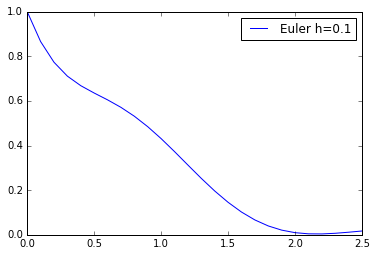

In [137]:
y_euler = euler1(ec_dif,1,2.5)
plot(y_euler[0],y_euler[1],label="Euler h=0.1")
legend()
show()

# Método de Taylor de segundo orden

Con este método se busca igualmente se quiere obtener es una solución aproximada a la ecuación diferencial de tipo:

$$y′(x0)=f(x,y),y(x0)=y0$$

pero en este caso se busca una aproximación por medio de su polinomio de Taylor.

$$y(x)\cong y(x_0)+y'(x_0)(x-x_0)+ \frac{1}{2}y''(x_0)(x-x_0)^2+\frac{1}{3!}y'''(x_0)(x-x_0)^3+\dotsb + \frac{y^N}{N!}(x-x_0)^N$$

En este caso el error de la aproximación esta dado por el resto de orden $N+1$ de tal forma que el error es proporcional a $(x-x_0)^{N+1}$ 

Ahora supongamos que fijamos una sucesión de puntos $x_0, x_1, x_2,\cdot$ con $x_{n+1} = x_n + h$, y denominamos  $y_0, y_1,\cdot$ a los valores paroximados correspondientes de $y(x)$ entonces tendremos que:

$$y_{n+1}=y_n+y'(x_n)h+ \frac{1}{2}y''(x_n)h^2+\frac{1}{3!}y'''(x_n)h^3+\dotsb + \frac{1}{N!}y^N(x_n)h^N$$

Un aspecto importante es que para este método se requiere de las derivadas de la solución que son desconocidas, sin embargo, tenemos que:

$$y'(x_n)=f(x_n,y_n)$$

y para el caso de orden dos podemos obtener $y''(x_n)$ calculando la derivada:

$$y''= \frac{d}{dx}f(x,y)=\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}\frac{\partial y}{\partial x}=\frac{\partial f}{\partial x}+\frac{\partial f}{\partial y}f(x,y)$$

Y para los demás ordenes podemos obtener las derivadas de la misma forma.

Continuando con el caso de orden dos, tenemos que para este caso el error local en esta aproximación será proporcional a $h^3$ y por tanto el error global lo será a $h^2$

In [138]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        f = ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

In [139]:
def e_d(y,t):
        return array([y[1],-.5*y[1]- sin(y[0])+exp(-t)*sin(3*t)])
    
    

def d_ed(y,t):
        return array([0,-3*exp(-t)*cos(3*t)+exp(-t)*sin(3*t)]),array([-cos(y[0]),-0.5])

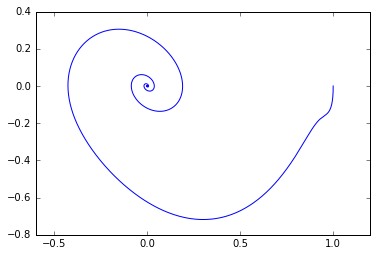

In [140]:
t,y=integra2(e_d,d_ed,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])


# Método de Runge-Kutta de segundo orden

En el método de Runge-Kutta lo que se tiene es nuevamente una ecuación diferencial de la forma:

$$y′(x0)=f(x,y),y(x0)=y0$$

Pero en este caso se sustituye por una ecuación integral:

$$\int_{y_0}^y dy=\int_{x_0}^x f(x,y(x))dx \implies y=y_0 +\int_{x_0}^x f(x,y(x))dx $$

Si nuevamente planteamos el problema paso a paso tendremos:

$$y_{n+1}=y_n+\int_{x_{n}}^{x_{n+1}} f(x,y(x))dx$$

Ahora bien, para poder obtener la solución lo que se hace es usar el método de los trapecios. Esto nos permite tener una aproximación mejor a que si integramos usando rectangulos iguales. Si hacem0s esto, obtenemos que:

$$\int_{x_{n}}^{x_{n+1}} f(x,y(x))dx \cong \frac{1}{2}h(f(x_n,y_n)+f(x_{n+1},y{n+1}))$$

Al ser desconocida $y_{n+1}$ en la expresión anterior, lo aproximaremos por $\vec y_{n+1}$, donde $\vec y_{n+1}$ es la aproximación para $y_{n+1}$ que resultaría si  aplicamos el método de Euler. Tendremos entonces que:

$$y_{n+1} = y_n + \frac{h}{2}(f(x_n,y_n)+f(x_{n+1},\vec y_{n+1}))$$

Si decimos que $k_1=hf(x_n,y_n)$ y $k_2=hf(x_{n+1},y_n+k_1)$ entonces podemos reescribir lo anterior como:

$$y_{n+1}=y_n+\frac{1}{2}(k_1+k2)$$

Si comparamos este método con el método de Taylor de segundo orden, podemos ver que el error local es proporcional a $h^3$  y que el error global lo es a $h^2$.

In [141]:
def rk2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

In [142]:
def p(y,t):
        return array([y[1],-.5*y[1]- sin(y[0])+exp(-t)*sin(3*t)])

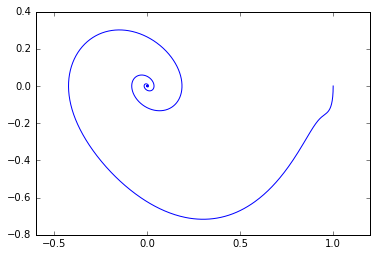

In [143]:
t,y=rk2(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

#  Metodo Runge-Kutta de cuarto orden

El método Runge-Kutta de cuarto orden se deducen de una manera similar al de orden dos y tres, en este caso se introducen nuevos pasos intermedios en la evaluación de la derivada. Una vez más se presentan varias opciones en la evaluación y es posible ajustar de tal manera que se garantice el error local de manera proporcional a $h^5$ (es decir garantizando exactitud en el cuarto orden en el polinomio de Taylor), lo cual lleva a un error global proporcional a $h^4$. El Método de cuarto orden esta dado de la siguiente manera:

$$k_1=hf(x_n,y_n)$$

$$k_2=hf(x_n+\frac{h}{2},y_n+\frac{k_1}{2}$$

$$k_2=hf(x_n+\frac{h}{2},y_n+\frac{k_2}{2}$$

$$k_2=hf(x_n+h,y_n+k_3$$

$$y_{n+1}=y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$$

Este método al igual que el método de tercer orden está basado en el método de interación de Simpson. Los errores local y global son en este caso proporcionales a $h^5$ y $h^4$ respectivamente.


In [144]:
def rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [145]:
def p(y,t):
        return array([y[1],-0.5*y[1]-sin(y[0])+ exp(-t)*sin(3*t)])

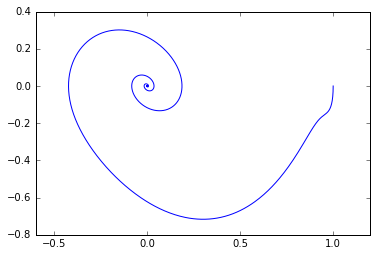

In [146]:
t,y=rk4(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

# Problema 2

La ecuación a resolver es la siguiente:

$$y'''+y''^2-3y^3+cos y= e^{-t}sin(3t)$$

# Método de Taylor de segundo orden

In [147]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        f = ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

In [148]:
def e_d2(y,t):
        return array([y[1],exp(-t)*sin(3*t)-y[1]**2-3*y[1]**3-cos(y[0])])
    
    

def d_ed2(y,t):
        return array([0,-3*exp(-t)*cos(3*t)+exp(-t)*sin(3*t)]),array([-sin(y[0]),9*y[1]**2-2*y[1]])

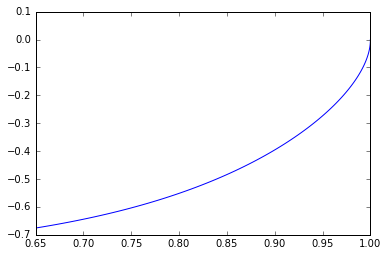

In [149]:
t,y=integra2(e_d2,d_ed2,[1,0],[1,2.],0.01)
plot(y[:,0],y[:,1])

# Método de Runge-Kutta de segundo orden

In [150]:
def rk2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

In [151]:
def p2(y,t):
        return array([y[1],exp(-t)*sin(3*t)-y[1]**2-3*y[1]**3-cos(y[0])])

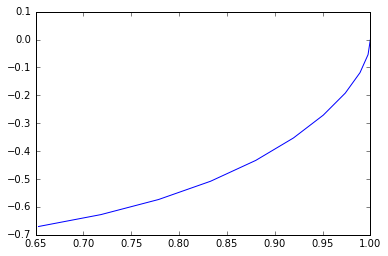

In [152]:
t,y=rk2(p2,[1,0],[1,2],0.100)
plot(y[:,0],y[:,1])

# Metodo Runge-Kutta de cuarto orden

In [153]:
def rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

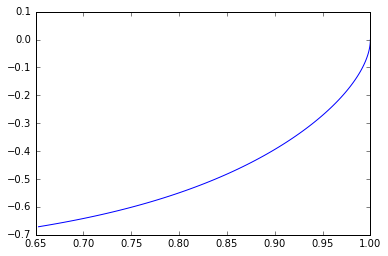

In [154]:
t,y=rk4(p2,[1,0],[1,2.],0.01)
plot(y[:,0],y[:,1])

#  Problema 3

La ecuación a resolver es: 

$$\ddot{x}+ \frac{1}{10} \dot{x}+4sin(x)=\frac{1}{2}sin(\omega t)$$

In [174]:
def integra2(ec,d_ec,p_ini,x,args=0,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in range(len(tiempos)-1):
            f = ec(sol[i,:],tiempos[i],args)
            df,jac=d_ec(sol[i,:],tiempos[i],args)
            sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
        
    for i in range(len(tiempos)-1):
        f = ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

In [175]:
def e_d_1(y,t):
    return array([y[1],-0.1*y[1]-4*sin(y[0]*1.5)+0.5*sin(1.5*t)])

def d_ed_1(y,t):
        return array([0,0.75*cos(t*1.5)]),array([-6*cos(y[0]*1.5),-0.1])

def e_d_2(y,t):
    return array([y[1],-0.1*y[1]-4*sin(y[0]*2.)+0.5*sin(2.*t)])

def d_ed_2(y,t):
        return array([0,cos(t*2.)]),array([-8.*cos(y[0]*2.),-0.1])
    
def e_d_3(y,t):
    return array([y[1],-0.1*y[1]-4*sin(y[0]*2.5)+0.5*sin(2.5*t)])

def d_ed_3(y,t):
        return array([0,1.25*cos(t*2.5)]),array([-10.*cos(y[0]*2.5),-0.1])

def e_d_4(y,t):
    return array([y[1],-0.1*y[1]-4*sin(y[0]*3.)+0.5*sin(3.*t)])

def d_ed_4(y,t):
        return array([0,1.5*cos(t*3.)]),array([-12.*cos(y[0]*3.),-0.1])

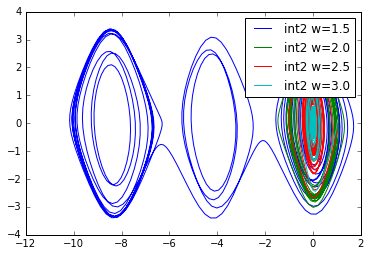

In [176]:
t,y=integra2(e_d_1,d_ed_1,[1,0],[1,100],0.01)
plot(y[:,0],y[:,1],label="int2 w=1.5")

t,y=integra2(e_d_2,d_ed_2,[1,0],[1,100],0.01)
plot(y[:,0],y[:,1],label="int2 w=2.0")

t,y=integra2(e_d_3,d_ed_3,[1,0],[1,100],0.01)
plot(y[:,0],y[:,1],label="int2 w=2.5")

t,y=integra2(e_d_4,d_ed_4,[1,0],[1,100],0.01)
plot(y[:,0],y[:,1],label="int2 w=3.0")

legend()
show()


In [157]:
def rk2_2(ec,p_ini,x,args=0,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in range(len(tiempos)-1):
            k = h*ec(sol[i,:],tiempos[i],args)
            f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h,args)
        sol[i+1,:]=sol[i,:]+h*f
        
        
    else:
        for i in range(len(tiempos)-1):
            k = h*ec(sol[i,:],tiempos[i])
            f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
            sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol

In [158]:
def p2_1(y,t):
        return array([y[1],-0.1*y[1]-4*sin(y[0]*1.5)+0.5*sin(1.5*t)])
    
def p2_2(y,t):
        return array([y[1],-0.1*y[1]-4*sin(y[0]*2.)+0.5*sin(2*t)])

def p2_3(y,t):
        return array([y[1],-0.1*y[1]-4*sin(y[0]*2.5)+0.5*sin(2.5*t)])
    
def p2_4(y,t):
        return array([y[1],-0.1*y[1]-4*sin(y[0])+0.5*sin(3.*t)])

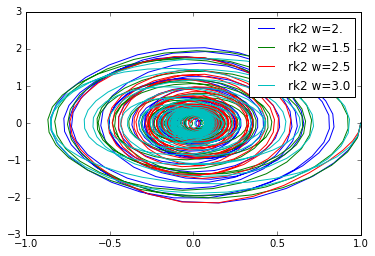

In [159]:
t,y=rk2_2(p2_2,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=2.")

t,y=rk2_2(p2_1,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=1.5")

t,y=rk2_2(p2_3,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=2.5")

t,y=rk2_2(p2_4,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=3.0")



legend()
show()


In [60]:
def rk4_2(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in range(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in range(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

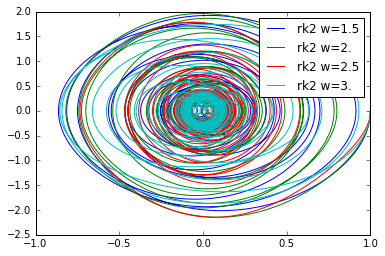

In [160]:
t,y=rk4(p2_1,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=1.5")

t,y=rk4(p2_2,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=2.")

t,y=rk4(p2_3,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=2.5")

t,y=rk4(p2_4,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1],label="rk2 w=3.")

legend()
show()